## Import

In [1]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
# %matplotlib inline

import pickle
import cv2

import importlib
# from classifiers import R_from_path
%config InlineBackend.figure_format = 'png' 

In [2]:
current_dir = os.getcwd()
code_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'codes'))
data_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'data'))

sys.path.append(os.path.join(code_path, 'project_x_ray_images_stack'))
# sys.path.append(r'E:\photoelectric_sorting\codes\project_x_ray_images_stack')

In [3]:
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
from matplotlib import rc

rc('text', usetex=False)
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 10}
rc('font', **font)

In [5]:
import seaborn as sns

# sns.set_context("notebook")
# sns.set_context('talk')
# sns.set_style("ticks")
# sns.set_style("whitegrid")

sns.reset_defaults()


In [6]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
import dataloader
importlib.reload(dataloader)
from dataloader import path2truth, path2pixel, load_data

In [8]:
excel_0225 = os.path.join(data_path, '化验结果/20250225化验结果.xlsx')
path_0225_p1 = os.path.join(data_path, '20250225/160kV_4mA_1_105_forward.png')
path_0225_p2 = os.path.join(data_path, '20250225/160kV_4mA_106_200_forward.png')

In [9]:
x1 = path2pixel(path_0225_p1, [[50, 1000, 350, 1150], [1850, -60, 350,1150]], max_len = [6, 9], length=[102, 35], 
               s_i = [64, 1], th_val = 115, save_rock_image = False, direction = 'ublr', save_rock_pixels=False)

x1[2][0].insert(55, np.array((0, 1)))
x1[2][1].insert(55, np.array((0, 1)))

x2 = path2pixel(path_0225_p2, [[30, 1000, 350, 1150], [1850, -60, 350,1150]], max_len = [7, 7], length=[35, 35], 
               s_i = [50, 1], th_val = 115, save_rock_image = False, direction = 'ublr', save_rock_pixels=False)

x2[2][0].insert(19, np.array((0, 1)))
x2[2][1].insert(19, np.array((0, 1)))

x2[2][0].insert(61, np.array((0, 1)))
x2[2][1].insert(61, np.array((0, 1)))

x  = [x1[2][0] + x2[2][0], x1[2][1] + x2[2][1]]

2025-04-17 15:33:47,925 - INFO - 2个盒子的图像转换rock_pixels完成。
2025-04-17 15:33:48,157 - INFO - 2个盒子的图像转换rock_pixels完成。


In [10]:
input_0225 = load_data(x, excel_0225)

2025-04-17 15:33:48,458 - INFO - 加载数据完成。清洗后的样本数量: 183


品位信息（加权平均）：
  - 铁品位：11.98% ± 9.48%
  - 锌品位：9.64% ± 11.91%
  - 铅品位：6.17% ± 10.63%
注：品位值为加权平均值，权重为矿石重量；± 后为标准差


In [68]:
path_0219 = os.path.join(data_path, '20250219/160kV_4mA_forward.png')
excel_0219 = os.path.join(data_path, '化验结果/20250219化验结果.xlsx')

excel_0224 = os.path.join(data_path, '化验结果/20250224化验结果.xlsx')
path_0224 = os.path.join(data_path, '20250224/160kV_4mA_forward.png')

z = path2pixel(path_0219, [[105, 1000, 400, 1200], [1950, 2844, 350, 1150]], max_len = [6, 9], length = [102, 35], 
           s_i = [64, 1], th_val = 105, save_rock_image = False, direction = 'ublr', save_rock_pixels=False)

consts = [5, 20]; th_val = 110

y = path2pixel(path_0224, [[105, 1000, 400, 1200], [1850,-100, 350,1150]], max_len = [6, 9], length=[102, 35], 
               s_i = [64, 1], th_val = 110, save_rock_image = False, direction = 'ublr', save_rock_pixels=False)


2025-04-17 17:13:57,211 - INFO - 2个盒子的图像转换rock_pixels完成。
2025-04-17 17:13:57,422 - INFO - 2个盒子的图像转换rock_pixels完成。


In [69]:
input_0224 = load_data(y[2], excel_0224)
input_0219 = load_data(z[2], excel_0219)

2025-04-17 17:13:57,758 - INFO - 加载数据完成。清洗后的样本数量: 102


品位信息（加权平均）：
  - 铁品位：11.08% ± 9.18%
  - 锌品位：1.39% ± 3.45%
  - 铅品位：1.32% ± 4.90%
注：品位值为加权平均值，权重为矿石重量；± 后为标准差


2025-04-17 17:13:58,226 - INFO - 加载数据完成。清洗后的样本数量: 98


品位信息（加权平均）：
  - 铁品位：15.58% ± 10.75%
  - 锌品位：3.74% ± 6.12%
  - 铅品位：2.60% ± 6.98%
注：品位值为加权平均值，权重为矿石重量；± 后为标准差


In [86]:
def merge_datasets(datasets):
    """
    合并多个数据集
    Parameters:
        datasets: 要合并的数据集列表，每个元素格式为 [pixels, truth]
                  pixels是包含低能和高能数据的列表
    Returns:
        合并后的数据集，格式为 [pixels, truth]
    """
    merged = [[], None]
    offset = 0
    
    # 合并pixels
    for i, dataset in enumerate(datasets):
        if not merged[0]:
            merged[0] = [d.copy(deep=True) for d in dataset[0]]
        else:
            for i in range(2):
                # 在复制的DataFrame上增加索引偏移量
                copied_data = dataset[0][i].copy(deep=True)
                copied_data.index += offset
                merged[0][i] = pd.concat([merged[0][i], copied_data], axis=0)

        if merged[1] is None:
            merged[1] = dataset[1].copy(deep=True)
            merged[1]['source'] = f'source_{i}'

        else:
            copied_truth = dataset[1].copy(deep=True)
            copied_truth['source'] = f'source_{i}'
            copied_truth.index += offset
            merged[1] = pd.concat([merged[1], copied_truth], axis=0)

        offset += len(dataset[0][0])
    
    # 计算Zn_Pb_grade
    merged[1]['Zn_Pb_grade'] = merged[1]['Zn_grade'] + merged[1]['Pb_grade']
    
    return merged

In [89]:

# 使用示例
input_test = merge_datasets([input_0219, input_0224, input_0225])  # 可以添加更多数据集

In [111]:
from itertools import combinations

def select_ores(data, N, target_grade):
    """
    从矿石数据中挑选N个矿石，使其加权平均铅锌品位接近目标值
    
    参数:
    data: pd.DataFrame, 包含weight, Pb_grade, Zn_grade等列
    N: int, 需要挑选的矿石数量
    target_grade: float, 目标铅锌品位
    
    返回:
    selected_data: pd.DataFrame, 挑选出的矿石数据
    """
    # 计算每个矿石的铅锌品位
    data['PbZn_grade'] = data['Pb_grade'] + data['Zn_grade']
    
    # 初始化最佳组合
    best_combination = None
    best_diff = float('inf')
    
    # 遍历所有可能的组合
    for combination in combinations(data.index, N):
        # 计算当前组合的加权平均品位
        weights = data.loc[list(combination), 'weight']
        grades = data.loc[list(combination), 'PbZn_grade']
        weighted_avg = np.average(grades, weights=weights)
        
        # 计算与目标值的差异
        current_diff = abs(weighted_avg - target_grade)
        
        # 如果当前组合更接近目标值，则更新最佳组合
        if current_diff < best_diff:
            best_diff = current_diff
            best_combination = combination
    
    # 返回最佳组合的数据
    return data.loc[list(best_combination)]

In [113]:
# ores = select_ores(input_test[1], 50, 3)

In [114]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def select_ores_ga(data, N, target_grade, pop_size=50, max_iter=100):
    """
    使用遗传算法挑选N个矿石，使其加权平均铅锌品位接近目标值
    
    参数:
    data: pd.DataFrame, 包含weight, Pb_grade, Zn_grade等列
    N: int, 需要挑选的矿石数量
    target_grade: float, 目标铅锌品位
    pop_size: int, 种群大小
    max_iter: int, 最大迭代次数
    
    返回:
    selected_data: pd.DataFrame, 挑选出的矿石数据
    """
    # 计算每个矿石的铅锌品位
    data['PbZn_grade'] = data['Pb_grade'] + data['Zn_grade']
    
    # 定义适应度函数
    def fitness_func(chromosome):
        selected_indices = np.where(chromosome == 1)[0]
        if len(selected_indices) != N:
            return 1e6  # 惩罚不符合数量要求的解
        
        weights = data.iloc[selected_indices]['weight']
        grades = data.iloc[selected_indices]['PbZn_grade']
        weighted_avg = np.average(grades, weights=weights)
        
        return abs(weighted_avg - target_grade)
    
    # 定义遗传算法参数
    varbound = np.array([[0, 1]] * len(data))
    algorithm_param = {
        'max_num_iteration': max_iter,
        'population_size': pop_size,
        'mutation_probability': 0.1,
        'elit_ratio': 0.01,
        'crossover_probability': 0.5,
        'parents_portion': 0.3,
        'crossover_type': 'uniform',
        'max_iteration_without_improv': None
    }
    
    # 创建并运行遗传算法
    model = ga(function=fitness_func,
               dimension=len(data),
               variable_type='int',
               variable_boundaries=varbound,
               algorithm_parameters=algorithm_param)
    
    model.run()
    
    # 获取最佳解
    best_solution = model.output_dict['variable']
    selected_indices = np.where(best_solution == 1)[0]
    
    return data.iloc[selected_indices]

 The best solution found:                                                                           
 [0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 

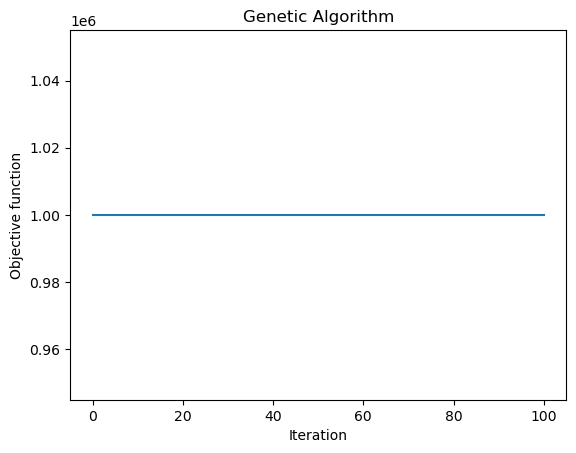

In [115]:
# 假设你的数据存储在df中
selected_ores = select_ores_ga(input_test[1], N=50, target_grade=3.0)

In [117]:
np.average(selected_ores['PbZn_grade'], weights=selected_ores['weight'])

10.746186707146403

## analysis

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable  # 新增导入
from scipy.stats import gaussian_kde

# 创建一个包含 2x2 子图的 Figure
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

def plot_dist(inputs): # = [input_0225, input_0219]
    for data in inputs:
        fig, axes = plt.subplots(3, 2, figsize=(12, 15))
        zn = data[1]['Zn_grade']
        pb = data[1]['Pb_grade']
        fe = data[1]['Fe_grade']
        zn_pb = zn + pb
        zn_pb_fe = zn + pb + fe
        R_0219 = RMethodClassifier(pixels=data[0], truth=data[1], I0_low=195, I0_high=196, input='pixels', method='a', const=[5, 20])
        R_mean = R_0219.R_pixels.apply(np.std)
        data_pairs = [(zn, R_mean), (pb, R_mean), (zn_pb, R_mean), (zn_pb_fe, R_mean), (fe, R_mean)]
        labels = ['zn', 'pb', 'zn_pb', 'zn_pb_fe', 'fe']
        marker_size = 5
        
        for i, (ax, (x, y), label) in enumerate(zip(axes.flat, data_pairs, labels)):
            # 绘制主散点图
            ax.scatter(x, y, s=marker_size)
            corr, p = pearsonr(x, y)
            ax.set_title(f'R_std vs {label}\nPearson r: {corr:.2f}, p: {p:.2e}')
            ax.set_xlabel(label)
            # ax.set_ylabel('R_mean')

            # 创建嵌入的小图
            axins = inset_axes(ax, width="30%", height="40%", loc='lower right')
            mask = (x >= 0) & (x <= 3)
            x_zoom = x[mask]
            y_zoom = y[mask]
            axins.scatter(x_zoom, y_zoom, s=marker_size)
            axins.set_xlim(-0.5, 3)

            # 新增：创建密度分布图
            divider = make_axes_locatable(ax)
            ax_density = divider.append_axes("bottom", size=0.2, pad=0.25, sharex=ax)
            kde = gaussian_kde(x)
            x_vals = np.linspace(x.min(), x.max(), 100)
            density = kde(x_vals)
            
            # 绘制密度曲线并填充
            ax_density.plot(x_vals, density, color='#1f77b4', lw=1)
            # ax_density.fill_between(x_vals, density, color='#1f77b4', alpha=0.4)
            
            # 反转y轴并调整格式
            ax_density.invert_yaxis()
            ax_density.set_yticks([])
            ax_density.xaxis.set_visible(False)  # 隐藏x轴
            ax_density.spines['top'].set_visible(False)
            # ax_density.spines['right'].set_visible(False)
            ax_density.spines['bottom'].set_visible(False)

        axes[2, 1].axis('off')

        # 调整布局避免重叠
        plt.subplots_adjust(hspace=0.4, wspace=0.3)
        plt.tight_layout()
        plt.show()

In [13]:
# plot_dist([input_0225])

In [ ]:
R dis vs zn dis?

In [24]:
R_0219.R_pixels

0     [0.6013860655336569, 0.6115731431628648, 0.612...
1     [0.5947395768284489, 0.6025953573292401, 0.610...
2     [0.6009493009027412, 0.6092156122814837, 0.624...
3     [0.6009538575837248, 0.603029464575499, 0.6029...
4     [0.6054164655250774, 0.6245848176338565, 0.631...
                            ...                        
94    [0.5892783090088173, 0.5880481130919839, 0.594...
95    [0.6230756662334885, 0.6272595212678455, 0.612...
96    [0.5954078607629238, 0.6000687190283241, 0.595...
97    [0.597295678104129, 0.6024307532707767, 0.5974...
98    [0.598610686321509, 0.5981516919737219, 0.6025...
Length: 98, dtype: object

In [65]:
calculate_rates(zn_pb_0219[0:99] > 3, true_0219[0:99, :])

{'抛废率': '0.630', '回收率': '0.924'}

In [30]:
calculate_rates(zn_pb_fe_0219[0:99] > 10.0, true_0219[0:99, :])

{'抛废率': '0.212', '回收率': '0.969'}

## R_double_threshold()

In [14]:
import importlib
from classifiers import base_classifier
from classifiers import dual_thresh
from classifiers import r_method
from classifiers import dual_mean, dual_mean_parallel, dual_all_parallel
from classifiers import demo

importlib.reload(base_classifier)
importlib.reload(dual_thresh)
importlib.reload(r_method)
importlib.reload(demo)
importlib.reload(dual_mean)
importlib.reload(dual_mean_parallel)

from classifiers import base_classifier
from classifiers.dual_thresh import DualThreshClassifier
from classifiers.r_method import RMethodClassifier
from classifiers.demo import Demo
from classifiers.dual_mean import DualMeanClassifier
from classifiers.dual_mean_parallel import DualMeanParallelClassifier
from classifiers.dual_all_parallel import ParallelClassifier

import utils
importlib.reload(utils)
from utils import plot_curves

In [15]:
def main(input, plot = False, include_Fe = False, title = ''):

    R_0219 = RMethodClassifier(pixels=input[0], truth=input[1], I0_low=195, I0_high=196, input= 'pixels', method= 'a', const= [5, 20], include_Fe = include_Fe)
    R_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, 
                  A_range=np.arange(0.5, 1.2, 0.01), step_B=0.05, grade_real_th= 0.1)
    res_R, log_R = Demo(R_0219).report_rates()

    dual_0219 = DualThreshClassifier(pixels=input[0][0], truth=input[1], pixel_kind= 'grayness', include_Fe = include_Fe)
    dual_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, 
                     A_range=np.arange(0, 256, 5), step_B=0.05, grade_real_th= 0.1)
    res_dual, log_dual = Demo(dual_0219).report_rates()

    if plot == True:

        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
        # 绘制曲线

        rates = [[res_R['ideal'], 'ideal', 'blue'], 
                [res_R['baseline'], 'R_mean', 'green'],
                [res_R['dual_thresh'], 'R_dual_thresh', 'red'],
                [res_dual['dual_thresh'], 'Dual_thresh','black']]
                #  [test_r[-2], test_r[-1], 'R_method_single_thresh', 'purple']]

        try:
            plot_curves(
                title = title, 
                rates = rates,
                scrap_rates_ideal= res_R['ideal'][0],
                grade_thresholds_ideal=res_R['ideal'][2],
                best_sum_point=res_R['best_sum_point'],
                best_enrichment_point=res_R['best_enrichment_point'],
                best_constraint_point=res_R['best_constraint_point'])
        except:
            logging.error('error in plotting')

    return (R_0219, res_R, log_R), (dual_0219, res_dual, log_dual)


In [20]:
dual_0224 = ParallelClassifier(pixels=input_0219[0][0], truth=input_0219[1], pixel_kind= 'grayness', include_Fe = False)
dual_0224.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, 
                    A_range=np.arange(0, 256, 5), step_B=0.05, grade_real_th= 0.1)

In [27]:
dual_0224.best_params

In [30]:
dual_0224_t = DualThreshClassifier(pixels=input_0224[0][0], truth=input_0224[1], pixel_kind= 'grayness', include_Fe = False)
dual_0224_t.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, 
                    A_range=np.arange(0, 256, 5), step_B=0.05, grade_real_th= 0.1)

In [31]:
testtest = Demo(dual_0224_t)

In [40]:
new_test = testtest.find_closest_point(target = [0.2, 0.95])

In [51]:
params = {}
params['close_scrap'] = [round(i, 4) for i in new_test[0][1:]]
params['close_recov'] = [round(i, 4) for i in new_test[1][1:]]

In [52]:
params

{'close_scrap': [0.1937, 0.9804], 'close_recov': [0.4433, 0.9499]}

In [34]:
print(testtest.report_rates()[1])


=== 最佳超参数 ===
灰度阈值: 25
比例阈值: 0.00%

=== 调优指标 ===
抛废率: 41.92%
回收率: 95.38%
铅富集比: 166.43%
锌富集比: 162.16%
铅平均品位（保留）: 2.19%
锌平均品位（保留）: 2.25%
铅平均品位（抛废）: 0.11%
锌平均品位（抛废）: 0.19%
铅平均品位: 1.32%
锌平均品位: 1.39%
准确率: 80.39%

=== 基于品位阈值2.50%的二分类指标 ===
准确率: 63.73%
精确率: 33.33%
召回率: 94.74%
F1 分数: 49.32%

=== AUC 结果 ===
AUC_基于化验品位: 0.9090
AUC_双阈值算法: 0.8625
AUC_平均值算法: 0.8389

=== 20%抛废率和95%回收率指标 ===
当回收率约为 98.04% 时，抛废率为 19.37%。此时的灰度阈值为35.0，比例阈值为0.00%。
当回收率约为 94.99% 时，抛废率为 44.33%。此时的灰度阈值为35.0，比例阈值为5.00%。



In [31]:
dual_0224 = DualThreshClassifier(pixels=input_0224[0][0], truth=input_0224[1], pixel_kind= 'grayness', include_Fe = False)
dual_0224.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, 
                    A_range=np.arange(0, 256, 5), step_B=0.05, grade_real_th= 0.1)

dmp_0224_new = ParallelClassifier(pixels=input_0224[0][0], truth=input_0224[1], pixel_kind= 'grayness')
dmp_0224_new.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05, 
               mean_range= np.arange(20, 100), grade_real_th=0.1)

In [48]:
R_0219 = RMethodClassifier(pixels=input_0219[0], truth=input_0219[1], I0_low=195, I0_high=196, input= 'pixels', method= 'a', const= [5, 20], include_Fe = False)
R_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, 
                A_range=np.arange(0.5, 1.2, 0.01), step_B=0.05, mean_range= np.arange(0.5, 1.2, 0.01), grade_real_th= 0.1)

In [17]:
dmp_0219 = DualMeanParallelClassifier(pixels=input_0219[0][0], truth=input_0219[1], pixel_kind= 'grayness')
dmp_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05, 
               mean_range= np.arange(20, 100), grade_real_th=0.1)

In [21]:
dmp_0225 = DualMeanParallelClassifier(pixels=input_0225[0][0], truth=input_0225[1], pixel_kind= 'grayness')
dmp_0225.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05, 
               mean_range= np.arange(20, 100, 5), grade_real_th=0.1)

In [23]:
dmp_0225.best_params

(35, 0.45, 55)

# 判断算法优劣的指标
- 能达到的最优的抛废率和回收率（跟理想曲线的接近程度）
- 达到最优时的各个参数值能够泛化到其他数据上（输出最佳参数值在其他数据上的最优抛废和回收）
- 在某种数据上达到最优值时跟在另外一类数据上达到最优值时的参数的差别
- 输出： best_metric; best_params

定义一个调优函数，测试每种算法在各类数据上的最优值

定义一个评估函数，输入每种算法的最优参数值，输出每种算法在测试数据上的表现

In [15]:
def tune(input_list, include_Fe = False):
    
    m_name = ['dmp', 'dual', 'Rmp', 'R']; 
    input_name = ['0219', '0224', 'both']
    res = {}
    i = 0
    for input in input_list:
        dmp = ParallelClassifier(pixels=input[0][0], truth=input[1], pixel_kind= 'grayness')
        dmp.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05, 
               mean_range= np.arange(20, 100), grade_real_th=0.1)
        
        dual = DualThreshClassifier(pixels=input[0][0], truth=input[1], pixel_kind= 'grayness', include_Fe = include_Fe)
        dual.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05, 
                    grade_real_th= 0.1)
        
        #考虑三个阈值时，R_method.py内部使用的还是ParallelClassifier
        Rmp = RMethodClassifier(pixels=input[0], truth=input[1], I0_low=195, I0_high=196, input= 'pixels', method= 'a', const= [5, 20], include_Fe = include_Fe)
        Rmp.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0.5, 1.2, 0.01), step_B=0.05, 
                   mean_range= np.arange(0.5, 1.2, 0.01), grade_real_th= 0.1)
        
        R = RMethodClassifier(pixels=input[0], truth=input[1], I0_low=195, I0_high=196, input= 'pixels', method= 'a', const= [5, 20], include_Fe = include_Fe)
        R.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0.5, 1.2, 0.01), step_B=0.05, 
                 grade_real_th= 0.1)
        
        algorithms = [dmp, dual, Rmp, R]

        j = 0
        for method in algorithms:
            if len(method.best_params) == 3:
                params = {'grayness_th': method.best_params[0], 'ratio_th': method.best_params[1], 'mean_th': method.best_params[2]}
            else:
                params = {'grayness_th': method.best_params[0], 'ratio_th': method.best_params[1]}

            params.update(method.best_metrics)
            res[input_name[i] + '_' + m_name[j]] = params
            
            j += 1
        i += 1

    return res           

In [54]:
res_all = tune([input_0219, input_0224, input_both])

In [18]:
len(res_all)

12

In [53]:
# with open('results.pkl', 'wb') as f:
#     pickle.dump(res_all, f) 

# with open ('results.pkl', 'rb') as f:
#     res_all = pickle.load(f)

with open ('results_new.pkl', 'rb') as f:
    res_all_new = pickle.load(f)



with open ('20250414_results_inlucde_0225.pkl', 'rb') as f:
    res_0225 = pickle.load(f)

with open ('20250414_results_inlucde_0225_v2.pkl', 'rb') as f:
    res_0225_new = pickle.load(f)

with open ('20250414_results_inlucde_0225_v3.pkl', 'rb') as f:
    res_0225_new_new = pickle.load(f)

In [54]:
pd.options.display.precision = 3
res_pd = pd.DataFrame(res_0225_new_new)

In [55]:
res_pd

,0219_dmp,0219_dual,0219_Rmp,0219_R,0224_dmp,0224_dual,0224_Rmp,0224_R,both_dmp,both_dual,both_Rmp,both_R,0225_dmp,0225_dual,0225_Rmp,0225_R
grayness_th,14,14,0.93,0.93,36,36,0.75,0.75,17,17,0.87,0.87,8,8,1.04,1.04
ratio_th,0.0,0.0,0.0,0.0,0.05,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_th,85,NaN,0.5,NaN,82,NaN,0.5,NaN,85,NaN,0.5,NaN,65,NaN,0.68,NaN
抛废率,0.276,0.276,0.344,0.344,0.436,0.436,0.436,0.436,0.415,0.415,0.413,0.413,0.359,0.359,0.361,0.355
回收率,0.964,0.964,0.951,0.951,0.95,0.95,0.95,0.95,0.953,0.953,0.953,0.953,0.954,0.954,0.954,0.955
铅富集比,1.342,1.342,1.468,1.468,1.708,1.708,1.708,1.708,1.651,1.651,1.646,1.646,1.529,1.529,1.533,1.519
锌富集比,1.325,1.325,1.435,1.435,1.661,1.661,1.661,1.661,1.613,1.613,1.608,1.608,1.465,1.465,1.469,1.457
铅平均品位（保留）,0.035,0.035,0.038,0.038,0.022,0.022,0.022,0.022,0.033,0.033,0.033,0.033,0.094,0.094,0.095,0.094
锌平均品位（保留）,0.049,0.049,0.054,0.054,0.023,0.023,0.023,0.023,0.042,0.042,0.042,0.042,0.141,0.141,0.142,0.14
铅平均品位（抛废）,0.003,0.003,0.003,0.003,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.004,0.004,0.004,0.004


In [41]:
res_0225_new['0219_dmp']['closest_scrap'] = new_test[0][1:]
res_0225_new['0219_dmp']['closest_recov'] = new_test[1][1:]

In [48]:
round(new_test[0][1], 4)

0.1937

In [46]:
res_pd

,0219_dmp,0219_dual,0219_Rmp,0219_R,0224_dmp,0224_dual,0224_Rmp,0224_R,both_dmp,both_dual,both_Rmp,both_R,0225_dmp,0225_dual,0225_Rmp,0225_R
grayness_th,14,14.000,0.930,0.930,36.000,36.000,0.750,0.750,17.000,17.000,0.870,0.870,8.000,8.000,1.040,1.040
ratio_th,0.0,0.000,0.000,0.000,0.050,0.050,0.050,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
mean_th,85,NaN,0.500,NaN,82.000,NaN,0.500,NaN,85.000,NaN,0.500,NaN,65.000,NaN,0.680,NaN
抛废率,0.276,0.276,0.344,0.344,0.436,0.436,0.436,0.436,0.415,0.415,0.413,0.413,0.359,0.359,0.361,0.355
回收率,0.964,0.964,0.951,0.951,0.950,0.950,0.950,0.950,0.953,0.953,0.953,0.953,0.954,0.954,0.954,0.955
铅富集比,1.342,1.342,1.468,1.468,1.708,1.708,1.708,1.708,1.651,1.651,1.646,1.646,1.529,1.529,1.533,1.519
锌富集比,1.325,1.325,1.435,1.435,1.661,1.661,1.661,1.661,1.613,1.613,1.608,1.608,1.465,1.465,1.469,1.457
铅平均品位（保留）,0.035,0.035,0.038,0.038,0.022,0.022,0.022,0.022,0.033,0.033,0.033,0.033,0.094,0.094,0.095,0.094
锌平均品位（保留）,0.049,0.049,0.054,0.054,0.023,0.023,0.023,0.023,0.042,0.042,0.042,0.042,0.141,0.141,0.142,0.140
铅平均品位（抛废）,0.003,0.003,0.003,0.003,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.004,0.004,0.004,0.004


In [48]:
pd.options.display.precision = 2
pd.DataFrame(res_all_new)

,0219_dmp,0219_dual,0219_Rmp,0219_R,0224_dmp,0224_dual,0224_Rmp,0224_R,both_dmp,both_dual,both_Rmp,both_R
grayness_th,15.0000,15.0000,0.9300,0.9300,25.0000,25.0000,0.7500,0.7500,20.0000,20.0000,0.8700,0.8700
ratio_th,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500,0.0500,0.0000,0.0000,0.0000,0.0000
mean_th,85.0000,NaN,0.5000,NaN,82.0000,NaN,0.5000,NaN,85.0000,NaN,0.5000,NaN
抛废率,0.2693,0.2693,0.3436,0.3436,0.4192,0.4192,0.4356,0.4356,0.3968,0.3968,0.4134,0.4134
回收率,0.9644,0.9644,0.9508,0.9508,0.9538,0.9538,0.9502,0.9502,0.9568,0.9568,0.9527,0.9527
铅富集比,1.3301,1.3301,1.4678,1.4678,1.6643,1.6643,1.7077,1.7077,1.6025,1.6025,1.6456,1.6456
锌富集比,1.3127,1.3127,1.4352,1.4352,1.6216,1.6216,1.6606,1.6606,1.5739,1.5739,1.6076,1.6076
铅平均品位（保留）,0.0346,0.0346,0.0381,0.0381,0.0219,0.0219,0.0225,0.0225,0.0319,0.0319,0.0328,0.0328
锌平均品位（保留）,0.0490,0.0490,0.0536,0.0536,0.0225,0.0225,0.0231,0.0231,0.0414,0.0414,0.0423,0.0423
铅平均品位（抛废）,0.0027,0.0027,0.0028,0.0028,0.0011,0.0011,0.0011,0.0011,0.0017,0.0017,0.0017,0.0017


In [64]:
ids = R19.pixels.apply(np.max).values > 0.93
ids2 = R19.pixels[ids].apply(np.mean)>0.5

In [ ]:
aa

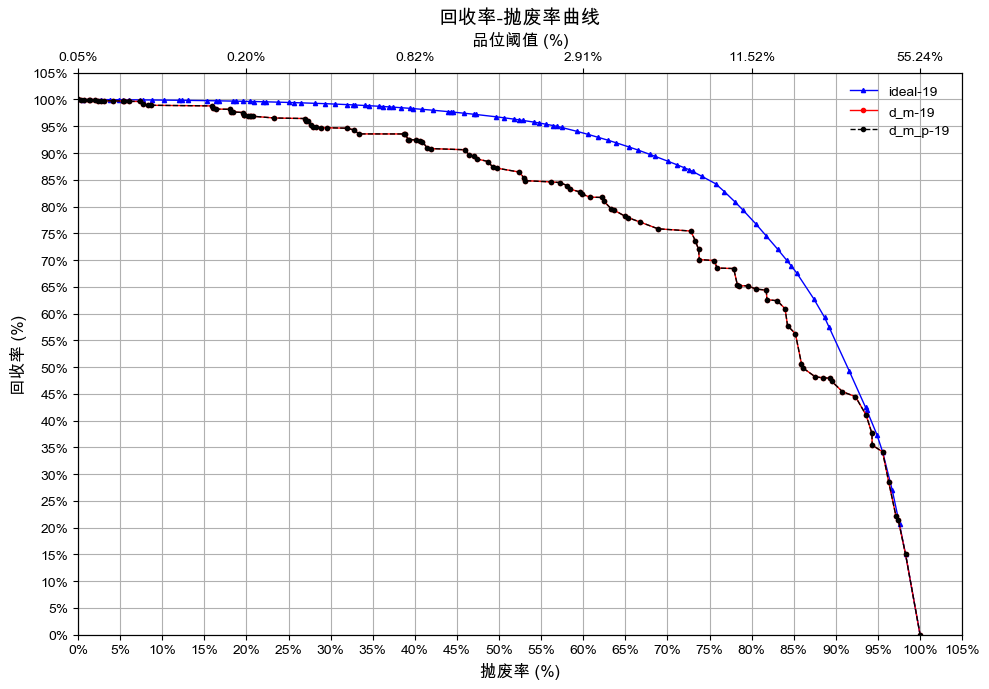

In [136]:
res_test = [[[], res_dm_0219]]

rates = [[res_test[0][1]['ideal'][0:2], 'ideal-19', 'blue', '-', '^'], 
         [res_test[0][1]['dual_thresh'][0:2], 'd_m-19', 'red', '-', 'o'],
        #   [res_0219[0][1]['dual_thresh'][0:2], 'd-19', 'black', '--', '^']
         [res_dmp_0219['dual_thresh'][0:2], 'd_m_p-19', 'black', '--', 'o'],

         ]

plot_curves(
    title = '回收率-抛废率曲线', 
    rates = rates,
    scrap_rates_ideal= res_test[0][1]['ideal'][0],
    grade_thresholds_ideal=res_test[0][1]['ideal'][2],
    best_constraint_point=res_test[0][1]['best_constraint_point'])

In [55]:
res_0219 = main(input_0219, plot = False, include_Fe=False, title = '0219, w/o Fe')
res_0224 = main(input_0224, plot = False, include_Fe=False, title = '0224, w/o Fe')

In [56]:
R19 = res_0219[0][0]
D19 = res_0219[1][0]

pre_r19 = R19.classify_ores(*(R19.best_params))
pre_d19 = D19.classify_ores(*(D19.best_params))

R24 = res_0224[0][0]
D24 = res_0224[1][0]
pre_r24 = R24.classify_ores(*(R24.best_params))
pre_d24 = D24.classify_ores(*(D24.best_params))

38


In [143]:
R19.pixels[38].mean()

0.663087935884476

In [144]:
R19.pb_zn_fe[38]

0.3679

In [99]:
R19.best_metrics

{'抛废率': 0.34364800558088543,
 '回收率': 0.9507657524462299,
 '铅富集比': 1.4678293778146658,
 '锌富集比': 1.435158440932202,
 '铅平均品位（保留）': 0.03814457789249924,
 '锌平均品位（保留）': 0.053620020877619204,
 '铅平均品位（抛废）': 0.002766771550786631,
 '锌平均品位（抛废）': 0.006309174943812079,
 '铅平均品位': 0.0259870653013429,
 '锌平均品位': 0.037361743030121825,
 '准确率': 0.8061224489795918}

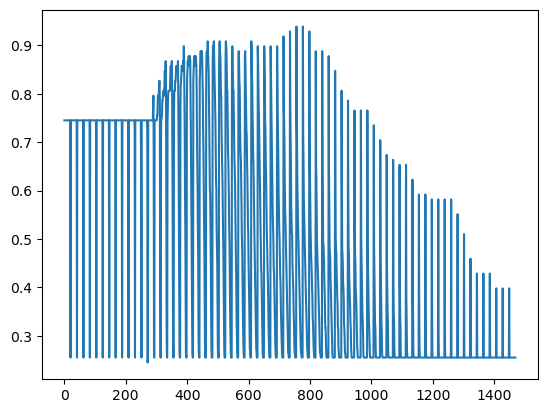

In [100]:
# plt.plot(R19.tuning_results['精确率'])
plt.plot(R19.tuning_results['准确率'])

In [32]:
D19.best_params

(15, 0.0)

In [17]:
accuracy_score(pre_r19, pre_d19)

0.9183673469387755

In [35]:
false = input_0219[1][pre_r19 == 0]
true = input_0219[1][pre_r19 == 1]
true_neg_id = (true['Zn_grade'] +  true['Pb_grade'] + true['Fe_grade']) < 10
false_pos_id = (false['Zn_grade'] +  false['Pb_grade'] + false['Fe_grade']) > 10

true_neg = true[true_neg_id]
false_pos = false[false_pos_id]

print(len(true_neg))
print(len(false_pos))

1
18


In [197]:
accuracy_score(pre_r19, (input_0219[1]['Zn_grade'] + input_0219[1]['Pb_grade']) > 3, normalize = False)

69.0

In [43]:
rpixels = R19.pixels[false_pos.index].values

In [54]:
rpixels[0].mean()

0.7093477036923915

(array([112., 316., 339., 625., 743., 483., 222., 117.,  39.,   7.]),
 array([0.58713615, 0.61702479, 0.64691342, 0.67680206, 0.70669069,
        0.73657933, 0.76646796, 0.7963566 , 0.82624523, 0.85613386,
        0.8860225 ]),
 <BarContainer object of 10 artists>)

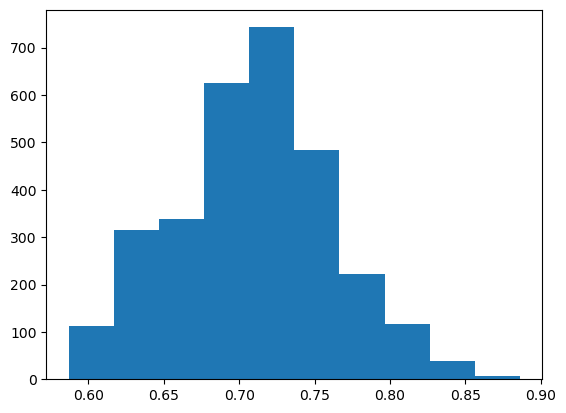

In [50]:
plt.hist(rpixels[0])

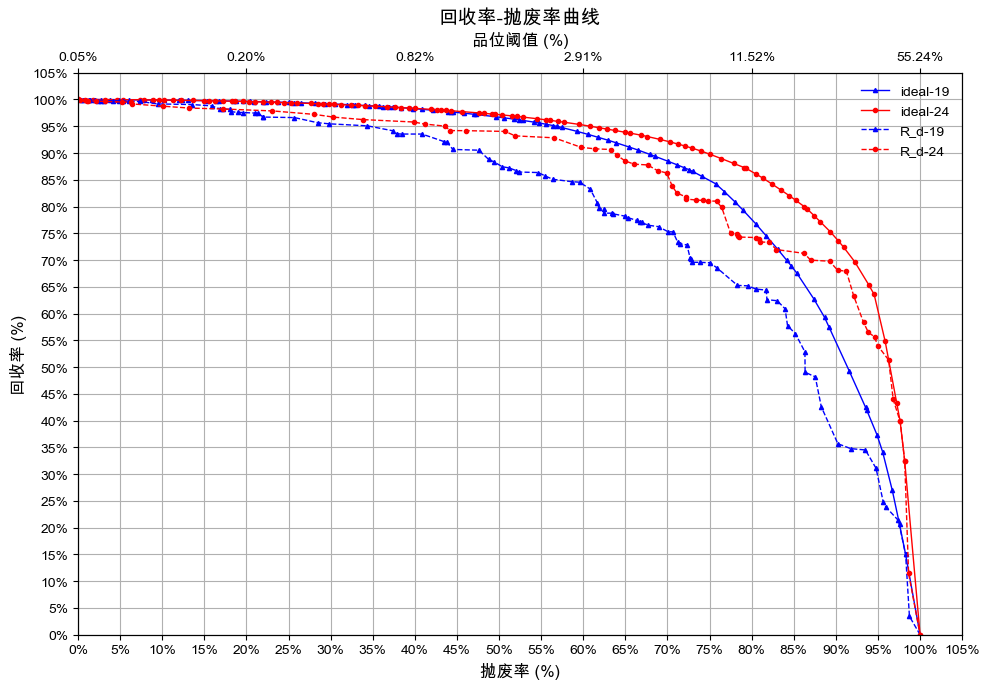

In [146]:
# rates = [[res_R['ideal'][0:2], 'ideal', 'blue'], 
#         [res_R['baseline'][0:2], 'R_mean', 'green'],
#         [res_R['dual_thresh'][0:2], 'R_dual_thresh', 'red'],
#         [res_dual['dual_thresh'][0:2], 'Dual_thresh','black']]

rates = [[res_0219[0][1]['ideal'][0:2], 'ideal-19', 'blue', '-', '^'], 
         [res_0224[0][1]['ideal'][0:2], 'ideal-24', 'red', '-', 'o'],
         [res_0219[0][1]['dual_thresh'][0:2], 'R_d-19', 'blue', '--', '^'],
         [res_0224[0][1]['dual_thresh'][0:2], 'R_d-24', 'red', '--', 'o']]
try:
    plot_curves(
        title = '回收率-抛废率曲线', 
        rates = rates,
        scrap_rates_ideal= res_0219[0][1]['ideal'][0],
        grade_thresholds_ideal=res_0219[0][1]['ideal'][2],
        best_constraint_point=res_0219[0][1]['best_constraint_point'])
except:
    logging.error('error in plotting')

In [29]:
R_mod = res_0219_fe[0][0]
D_mod = res_0219_fe[1][0]

In [58]:
# mask = [True]*98
np.average(input_both[1]['Fe_grade'], weights=input_both[1]['weight'])

13.45195578235766

Text(0.5, 1.0, 'Accuracy and Grade')

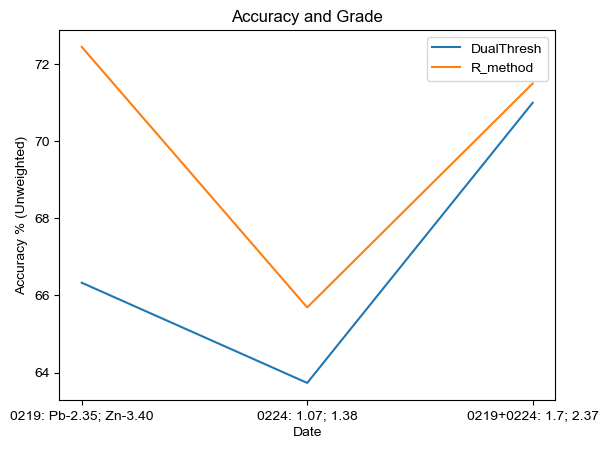

In [237]:
accuracy_dual = [66.33, 63.73, 71.00]
accuracy_R = [72.45, 65.69, 71.50]

plt.plot(accuracy_dual, label='DualThresh')
plt.plot(accuracy_R, label='R_method')
plt.xlabel('Date')
plt.ylabel('Accuracy % (Unweighted)')
plt.xticks(range(3), ['0219: Pb-2.35; Zn-3.40', '0224: 1.07; 1.38', '0219+0224: 1.7; 2.37'])
plt.legend()
plt.title('Accuracy and Grade')

In [226]:
with open('res_both_R.txt', 'w') as f:
    f.write(res_both[0][1])

with open('res_both_dual.txt', 'w') as f:
    f.write(res_both[1][1])

with open('res_0219_R.txt', 'w') as f:
    f.write(res_0219[0][1])

with open('res_0219_dual.txt', 'w') as f:
    f.write(res_0219[1][1])

with open('res_0224_R.txt', 'w') as f:
    f.write(res_0224[0][1])

with open('res_0224_dual.txt', 'w') as f:
    f.write(res_0224[1][1])